<a href="https://colab.research.google.com/github/jfreedman340/Financial-Markets/blob/main/2_Stock_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11111111)

In [ ]:
mean_return = 0.01 * np.random.randn(2)
mean_return

array([-0.00798242,  0.00181554])

In [ ]:
rho = 0.01 * np.random.randn()
rho

0.007129547452251222

In [ ]:
sigmas = np.exp(np.random.randn(2))
sigmas

array([0.47742841, 0.08582361])

In [ ]:
cov = np.diag(sigmas**2)
cov

array([[0.22793789, 0.        ],
       [0.        , 0.00736569]])

In [ ]:
sigma12 = sigmas[0] * sigmas[1] * rho
cov[0,1] = sigma12
cov[1,0] = sigma12
cov

array([[0.22793789, 0.00029213],
       [0.00029213, 0.00736569]])

In [ ]:
def softmax(w):
  a = np.exp(w)
  return a / a.sum()
  

In [ ]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  w = softmax(np.random.randn(2))
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

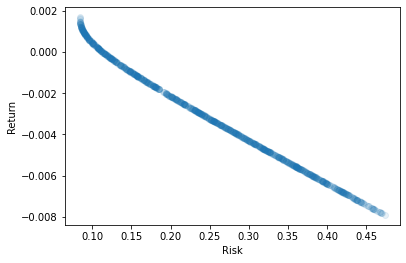

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

In [ ]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x = np.random.random()
  w = np.array([x, 1-x]) # positive-only
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

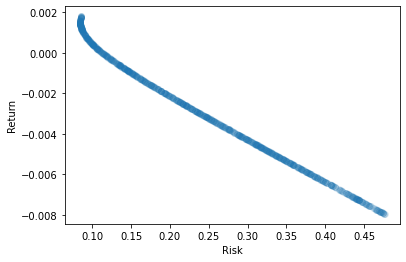

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

In [ ]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x = np.random.random() - 0.5
  w = np.array([x, 1-x]) # short-selling allowed
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

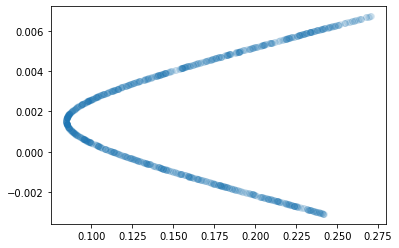

In [ ]:
plt.scatter(risks, returns, alpha=0.1);

# 3-Asset Portfolio

In [ ]:
mean_return = 0.01 * np.random.randn(3)
mean_return

array([ 0.01307677,  0.00461108, -0.00528151])

In [ ]:
sigmas = np.exp(np.random.randn(3))
sigmas

array([6.61732752, 0.95468421, 0.36013389])

In [ ]:
rhos = 0.01 * np.random.randn(3)
rhos

array([-0.01077798,  0.00687809,  0.00808248])

In [ ]:
cov = np.array([
    [sigmas[0]**2, rhos[0]*sigmas[0]*sigmas[1], rhos[1]*sigmas[0]*sigmas[2]],
    [rhos[0]*sigmas[0]*sigmas[1], sigmas[1]**2, rhos[2]*sigmas[1]*sigmas[2]],
    [rhos[1]*sigmas[0]*sigmas[2], rhos[2]*sigmas[1]*sigmas[2], sigmas[2]**2],
  ])
cov

array([[ 4.37890236e+01, -6.80894269e-02,  1.63913334e-02],
       [-6.80894269e-02,  9.11421944e-01,  2.77887021e-03],
       [ 1.63913334e-02,  2.77887021e-03,  1.29696416e-01]])

In [ ]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x1, x2 = np.random.random(2) - 0.5
  w = np.array([x1, x2, 1 - x1 - x2]) # short-selling allowed
  np.random.shuffle(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

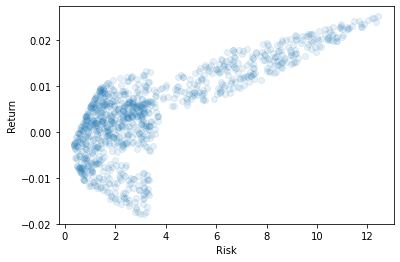

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

# Max and Min Return 

In [ ]:
from scipy.optimize import linprog

In [ ]:
D = len(mean_return)

In [ ]:
A_eq = np